In [9]:
import matplotlib.pyplot as plt
import numpy as np

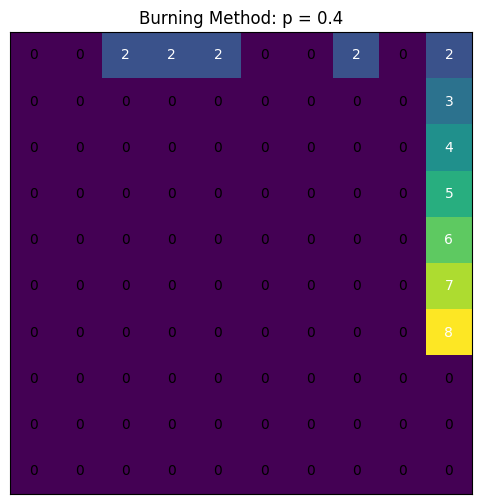

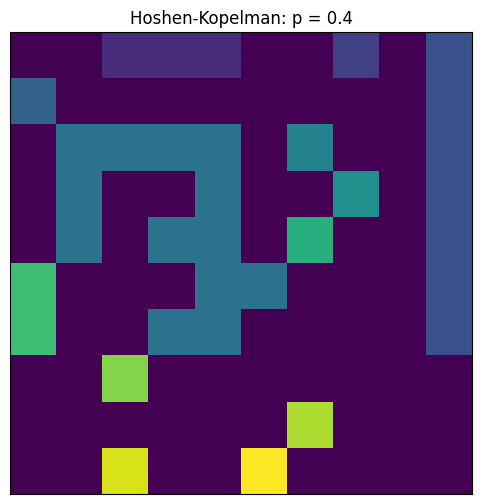

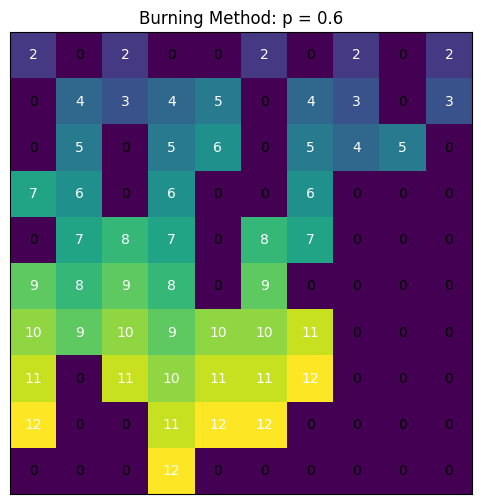

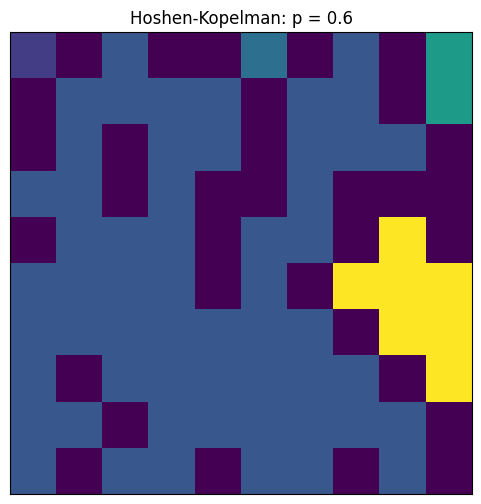

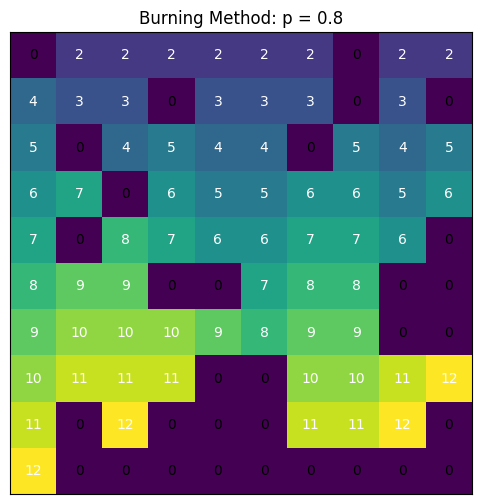

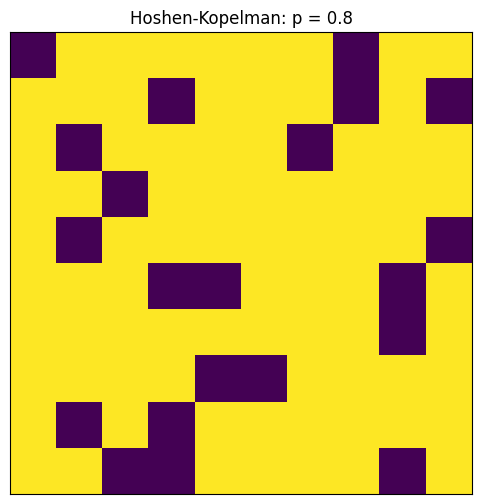

In [ ]:
from percolation import generate_lattice, burning_method, hoshen_kopelman

L = 10
p_values = [0.4, 0.6, 0.8]

for p in p_values:
    lattice = generate_lattice(L, p)
    _, labels = burning_method(lattice)
    
    plt.figure(figsize=(6, 6))
    plt.imshow(labels, cmap='viridis', interpolation='nearest')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xticks([])
    plt.yticks([])
    for i in range(labels.shape[0]):
        for j in range(labels.shape[1]):
            plt.text(j, i, str(labels[i, j]), ha='center', va='center', color='black' if labels[i, j] == 0 else 'white')
    plt.title(f'Burning Method: p = {p}')
    plt.show()
    
    labels, _ = hoshen_kopelman(lattice, True)

    plt.figure(figsize=(6, 6))
    plt.imshow(labels, cmap='viridis', interpolation='nearest')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xticks([])
    plt.yticks([])
    plt.title(f'Hoshen-Kopelman: p = {p}')
    plt.show()
    

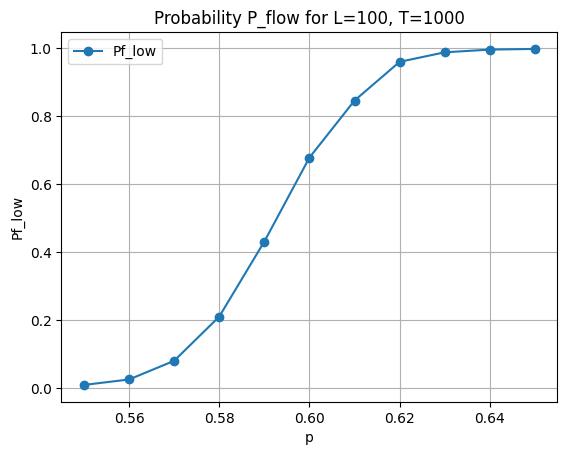

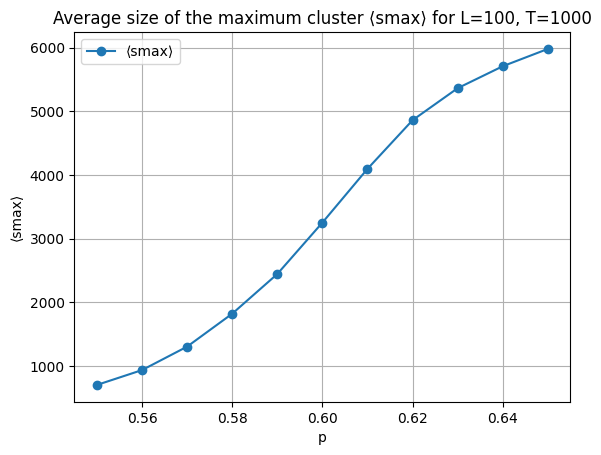

In [8]:
def plot_results(L, T):
    results_filename = f'Ave-L{L}T{T}.txt'
    data = np.loadtxt(results_filename)
    p_values = data[:, 0]
    P_flow_values = data[:, 1]
    smax_values = data[:, 2]

    plt.figure()
    plt.plot(p_values, P_flow_values, 'o-', label='P_flow')
    plt.xlabel('p')
    plt.ylabel('P_flow')
    plt.legend()
    plt.title(f'Probability P_flow for L={L}, T={T}')
    plt.grid(True)
    plt.savefig(f'P_flow_L{L}_T{T}.png')

    plt.figure()
    plt.plot(p_values, smax_values, 'o-', label='⟨smax⟩')
    plt.xlabel('p')
    plt.ylabel('⟨smax⟩')
    plt.legend()
    plt.title(f'Average size of the maximum cluster ⟨smax⟩ for L={L}, T={T}')
    plt.grid(True)
    plt.savefig(f'smax_L{L}_T{T}.png')

    plt.show()

plot_results(100, 1000)

C:\Users\mwdzi\AppData\Local\Temp\ipykernel_15160\2947171288.py:25: RuntimeWarning: overflow encountered in exp
  return A1 * s**(-A2) * np.exp(A3 * s)
C:\Users\mwdzi\AppData\Local\Temp\ipykernel_15160\2947171288.py:25: RuntimeWarning: overflow encountered in multiply
  return A1 * s**(-A2) * np.exp(A3 * s)
C:\Users\mwdzi\AppData\Local\Temp\ipykernel_15160\2947171288.py:31: RuntimeWarning: overflow encountered in exp
  return A6 * np.exp(-A7 * s**(1 - 1/A8))


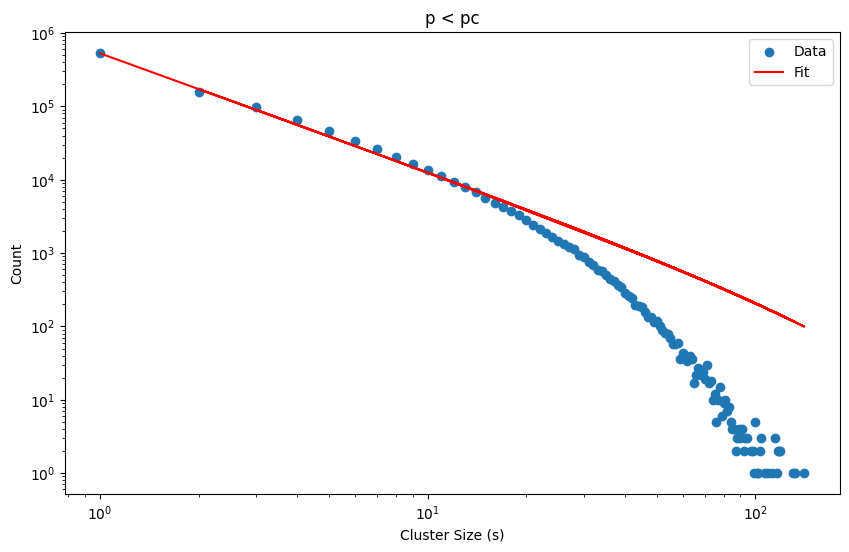

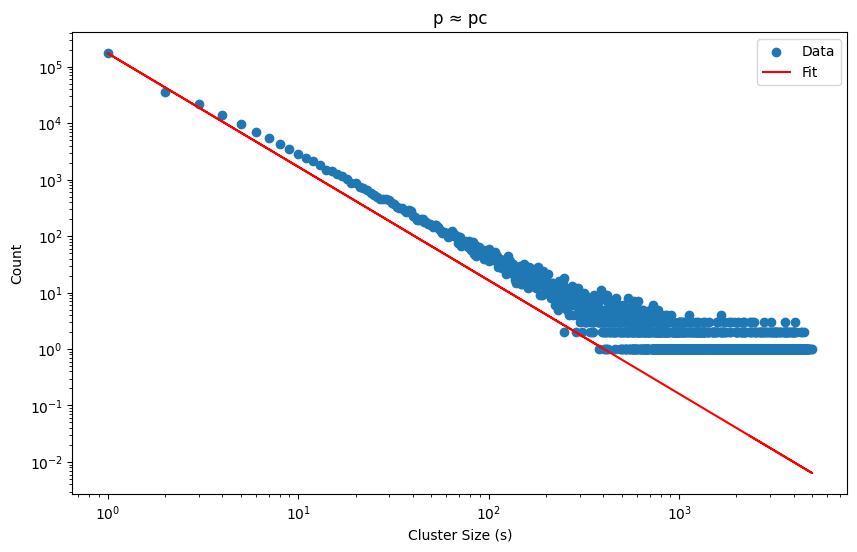

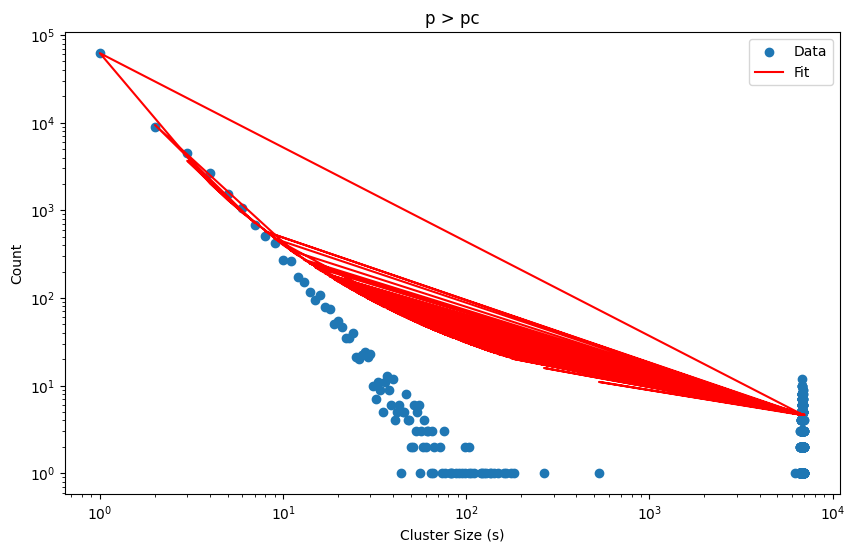

In [5]:
from collections import Counter
from scipy.optimize import curve_fit
from percolation import generate_lattice, burning_method, hoshen_kopelman
import numpy as np


def generate_cluster_distribution(L, T, p):
    cluster_distribution = Counter()
    for _ in range(T):
        lattice = generate_lattice(L, p)
        _, cluster_sizes = hoshen_kopelman(lattice)
        cluster_distribution.update(cluster_sizes)
    return cluster_distribution

L = 100
T = 1000
p_values = [0.4, 0.592746, 0.7]  # Example values for p < pc, p ≈ pc, p > pc

distributions = {}
for p in p_values:
    distributions[p] = generate_cluster_distribution(L, T, p)
    
    
def scaling_law_p_less_pc(s, A1, A2, A3):
    return A1 * s**(-A2) * np.exp(A3 * s)

def scaling_law_p_approx_pc(s, A4, A5):
    return A4 * s**(-A5)

def scaling_law_p_greater_pc(s, A6, A7, A8):
    return A6 * np.exp(-A7 * s**(1 - 1/A8))

def fit_scaling_law(distribution, scaling_law, initial_guess):
    sizes = np.array(list(distribution.keys()))
    counts = np.array(list(distribution.values()))
    popt, pcov = curve_fit(scaling_law, sizes, counts, p0=initial_guess)
    return popt, pcov

# Fit the scaling laws
params_p_less_pc, _ = fit_scaling_law(distributions[p_values[0]], scaling_law_p_less_pc, [1, 1, -0.1])
params_p_approx_pc, _ = fit_scaling_law(distributions[p_values[1]], scaling_law_p_approx_pc, [1, 1])
params_p_greater_pc, _ = fit_scaling_law(distributions[p_values[2]], scaling_law_p_greater_pc, [1, 1, 1])

def plot_fit(distribution, scaling_law, params, title):
    sizes = np.array(list(distribution.keys()))
    counts = np.array(list(distribution.values()))
    
    plt.figure(figsize=(10, 6))
    plt.scatter(sizes, counts, label='Data')
    plt.plot(sizes, scaling_law(sizes, *params), label='Fit', color='red')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Cluster Size (s)')
    plt.ylabel('Count')
    plt.title(title)
    plt.legend()
    plt.show()

plot_fit(distributions[p_values[0]], scaling_law_p_less_pc, params_p_less_pc, 'p < pc')
plot_fit(distributions[p_values[1]], scaling_law_p_approx_pc, params_p_approx_pc, 'p ≈ pc')
plot_fit(distributions[p_values[2]], scaling_law_p_greater_pc, params_p_greater_pc, 'p > pc')
